# Lab 5: Basketball Salaries

## Data Source: 

- player stats taken from [source](https://www.basketball-reference.com/leagues/NBA_2022_per_poss.html) (2021-2022 season)
- salaries taken from [source](https://www.basketball-reference.com/contracts/players.html) (2022-2023 season)

# Introduction: Predicting NBA player salary from on-court statistics

Why do some NBA players get paid more than others?  Is it because they are defensive stalwarts whose rebounds, blocks and steals (REB, BLK, STL) are so impressive.  Or maybe the players who get paid the most are masterful on the other end of the court, scoring more points, with higher shooting percentages (PTS, FG)?

To answer this question, we'll build a regression model which predicts salary from on-court statistics.

In [3]:
import pandas as pd

df = pd.read_csv('nba_prepped.csv', index_col='player_id')

df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,salary2022-2023_mill
player_id,,,,,,,,,,,,,,,,,,,,,
achiupr01,Precious Achiuwa,C,22,TOR,73,28,1725,7.7,17.5,0.439,...,13.7,2.4,1.1,1.2,2.4,4.4,19.2,105.0,110,2.840160
adamsst01,Steven Adams,C,28,MEM,76,75,1999,5.0,9.2,0.547,...,18.2,6.1,1.6,1.4,2.8,3.7,12.6,125.0,108,17.926829
adebaba01,Bam Adebayo,C,24,MIA,56,56,1825,11.1,20.0,0.557,...,15.5,5.2,2.2,1.2,4.1,4.7,29.3,117.0,104,30.351780
aldamsa01,Santi Aldama,PF,21,MEM,32,0,360,7.0,17.5,0.402,...,11.6,2.8,0.8,1.3,2.1,4.8,17.5,101.0,111,2.094120
allengr01,Grayson Allen,SG,26,MIL,66,61,1805,6.8,15.1,0.448,...,5.9,2.7,1.2,0.5,1.1,2.6,19.5,122.0,114,8.500000


# Part A: Building Decision Tree Regressor

Predict the salary of a player:
   - whose team score 31 points per 100 team possessions
   - whose team attempts 4 free throws per 100 team possessions
   - (write your answer in one complete sentence in a markdown cell directly below the table)

|--- feature_20 <= 30.05
|   |--- feature_20 <= 23.85
|   |   |--- value: [6.06]
|   |--- feature_20 >  23.85
|   |   |--- value: [14.40]
|--- feature_20 >  30.05
|   |--- feature_9 <= 5.15
|   |   |--- value: [16.51]
|   |--- feature_9 >  5.15
|   |   |--- value: [35.49]



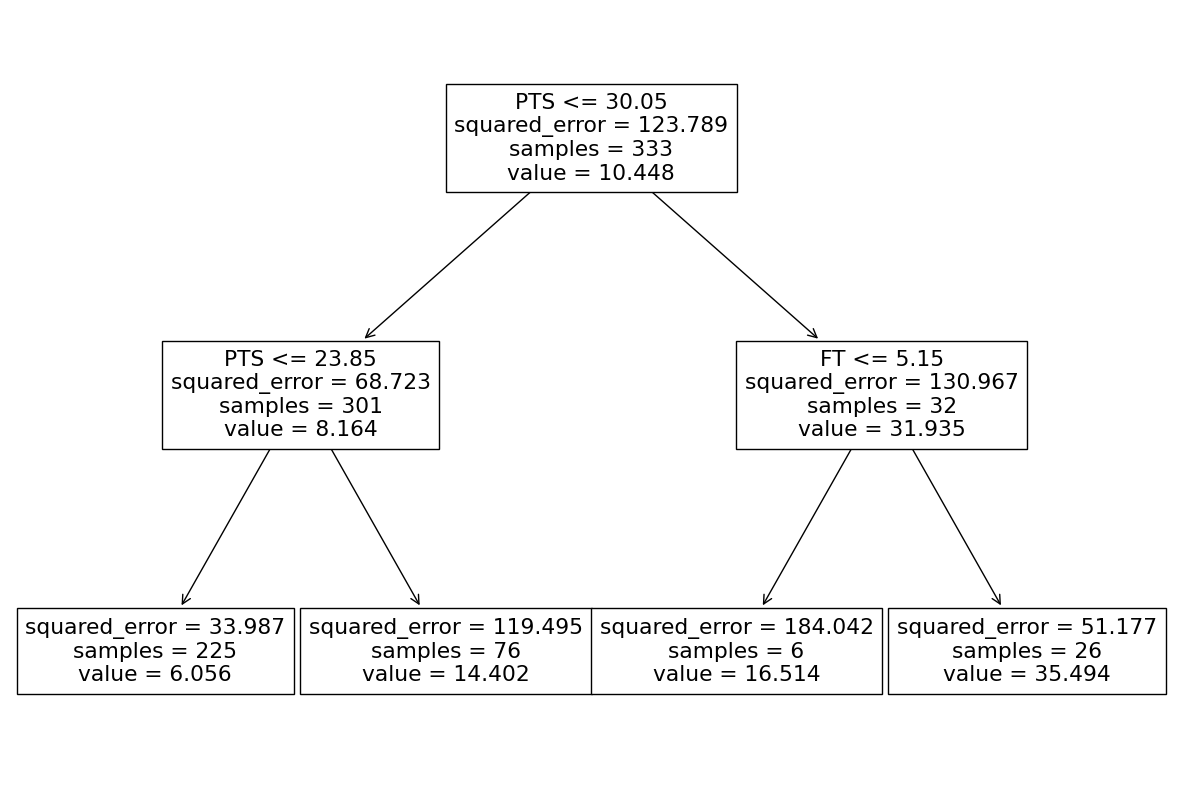

In [27]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree

# extract data
x_feats = df.columns[7: -1]
x = df.loc[:, x_feats].values
y = df.loc[:, "salary2022-2023_mill"].values

# initialize regressor, fit, predict
dtr = DecisionTreeRegressor(max_depth = 2)
dtr.fit(x, y)

# plot tree
plt.figure()
plt.gcf().set_size_inches(15, 10)
tree.plot_tree(dtr, feature_names = list(x_feats))
print(tree.export_text(dtr))

following the decision tree, the program has predicted that a player who fits this criteria **earns a salary of $16.514 million.**

# Part B: Ensuring the Random Forest Regressor Works

In [41]:
from sklearn.ensemble import RandomForestRegressor

# reload data
x = x
y = y

# initialize model, fit, compute r2
rfr = RandomForestRegressor(max_depth = 5)
rfr.fit(x, y)
rfr.score(x, y)

0.8047503000812406

an r2 score of roughly 0.81 implies a strong positive correlation between the x and y features. this means that as the value of the x features increase, so will the value of the salary.

# Part C: Feature Importance

In [45]:
def plot_feat_import(feat_list, feat_import, sort = True):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance from top to bottom of plot  
    """
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import, color = "r", alpha = .7)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel("importance of each feature")
    plt.grid(False)

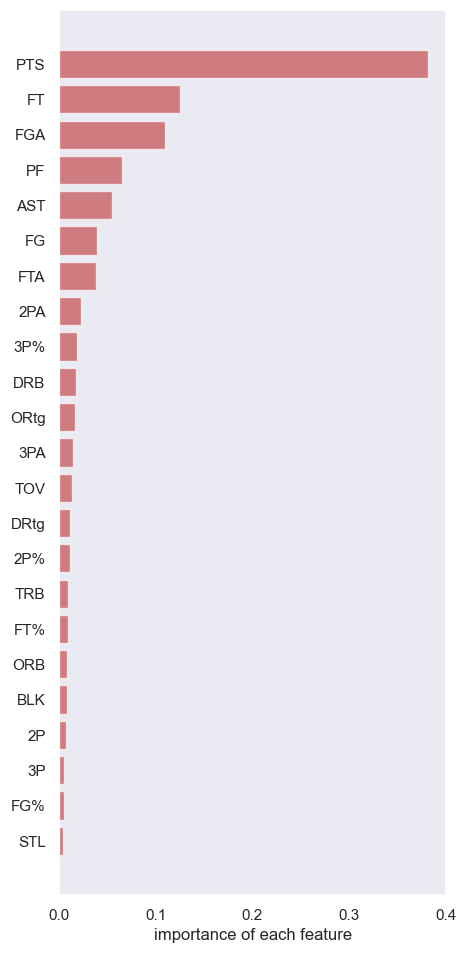

In [46]:
import seaborn as sns

sns.set()
feat_list = list(x_feats)
plot_feat_import(feat_list, rfr.feature_importances_)

this feature importance plot shows that **the number of points a team earned per 100 team possessions** was the largest predictor of what a player's salary would look like.